# Data Visualization Group Assignment - Group 6

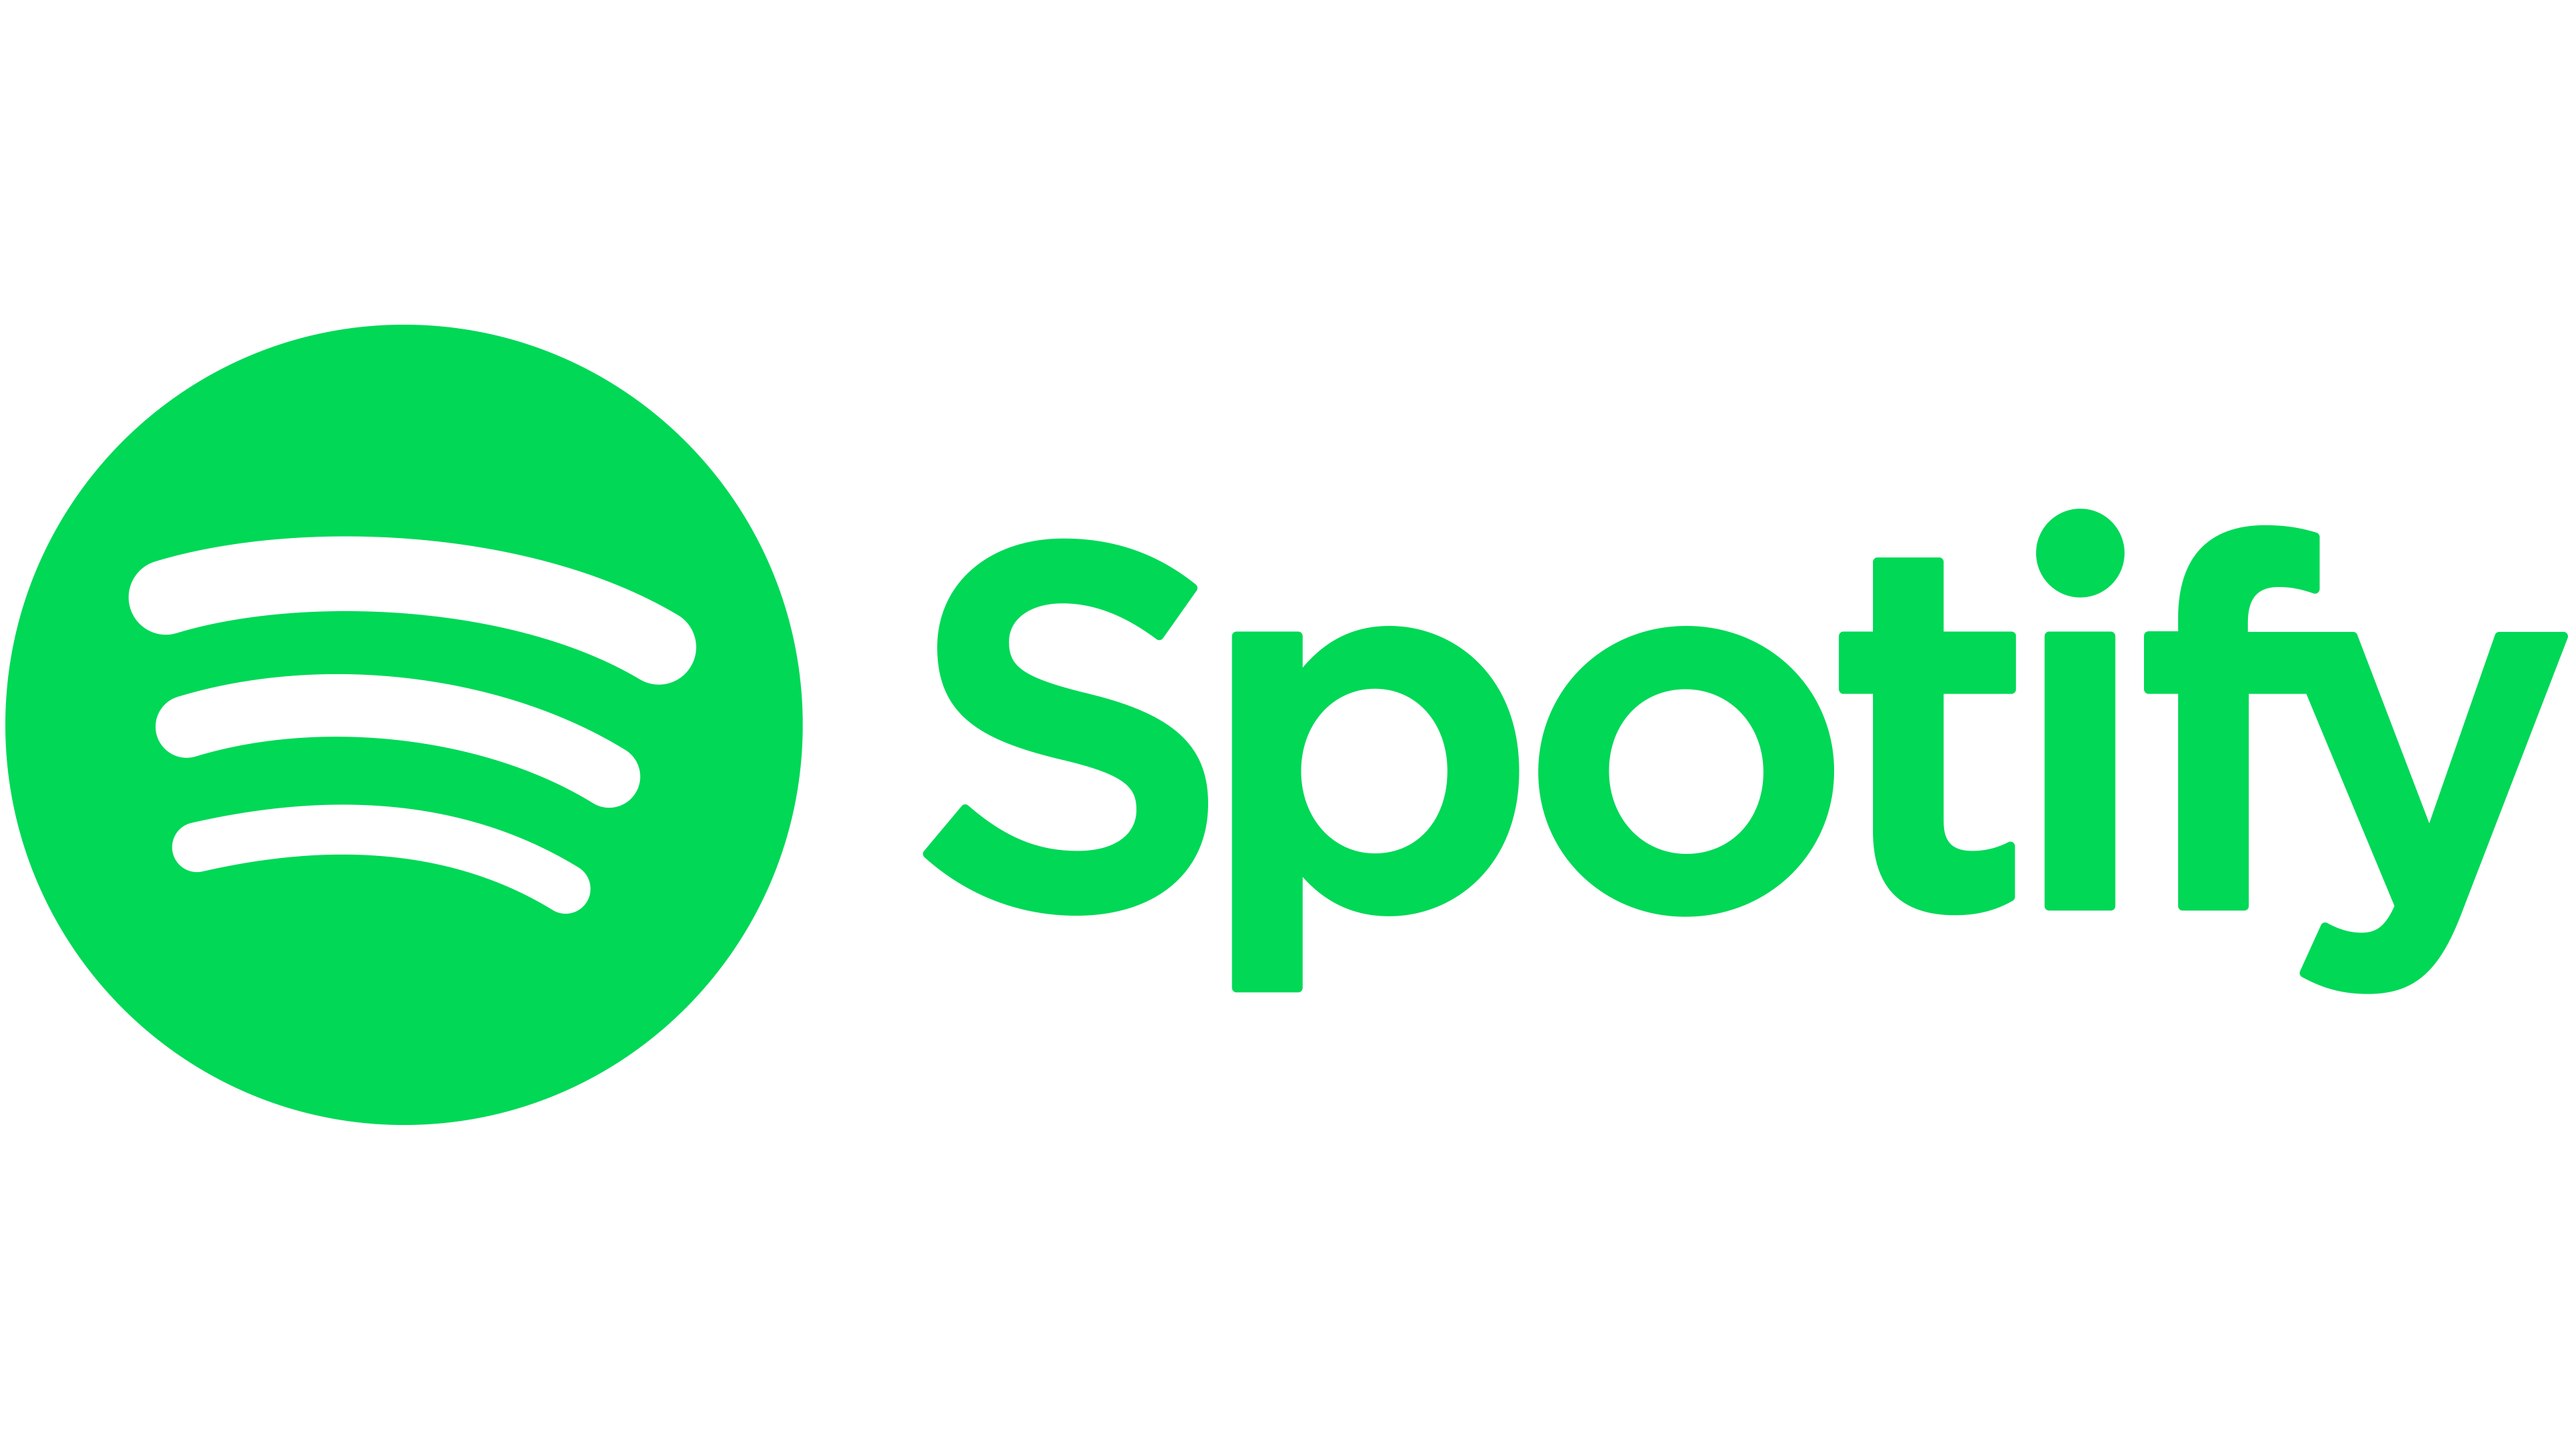

## Introduction

In this assignment, we will do an Exploratory Data Analysis and then, answer to some business questions with some graphs.
The dataset (found in Kaggle.com) contains more than 175,000 songs collected from Spotify. The variables are divided into the following variables:

Primary:
- id (Id of track generated by Spotify)

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

## 1. Importing the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# The use style in Matplotlib is setting as default
plt.style.use('default')

## 2. EDA with Pandas

In [3]:
# Loading the data
df = pd.read_csv('data.csv')

In [120]:
# Information about the schema of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [121]:
# Checking the number of rows and columns
df.shape

(174389, 19)

In [122]:
# Checking the first 5 rows of the df
df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [123]:
# Sampling a number of rows
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
134620,0.24700,['Boney M.'],0.824,156027,0.63600,0,1UdCWA59HIrFXZCFGIW4JY,0.000246,7,0.0279,-7.949,1,King of the Road,36,1978,0.0625,117.580,0.9220,1978
133536,0.00129,['Funkadelic'],0.508,186733,0.68500,0,46zlrFdCI5YvoXuKggznvx,0.000009,1,0.6500,-9.088,0,No Compute,27,1973-07-09,0.0633,126.779,0.6220,1973
13385,0.87800,['Perry Como'],0.415,197627,0.22000,0,1naVD19eofGpFf6wosmHIe,0.651000,8,0.1250,-17.470,1,And I Love You So,57,1987-10-03,0.0261,90.267,0.2680,1987
104393,0.05350,['Loose Ends'],0.808,268667,0.27400,0,4utTIZQ349USPaOdgN1RDZ,0.046400,8,0.2750,-15.284,0,Don't You Ever (Try To Change Me),35,1990-01-01,0.0742,95.293,0.5850,1990
127189,0.34700,['Эрнест Хемингуэй'],0.726,103700,0.12400,1,75D4AC2EkP9euCqyPeiaK8,0.000000,7,0.1620,-17.056,1,Часть 10.2 - Зеленые холмы Африки,0,1935,0.9240,100.758,0.6220,1935
3301,0.93600,['Billie Holiday'],0.717,170973,0.21200,0,2jOeSviYsdAy2QpHsPkZBg,0.000002,5,0.7420,-11.794,1,Without Your Love - Take 1,17,1937,0.0554,118.685,0.7730,1937
45091,0.98300,['Bud Powell'],0.463,177200,0.00388,0,6jfAGkf92WoNztjVa6Md9v,0.932000,5,0.0977,-23.610,1,It Never Entered My Mind,10,1954-01-01,0.0722,102.176,0.3480,1954
27442,0.84100,['Enrique Guzman'],0.385,220933,0.29500,0,0pfZCtCDHwLqKShDp4uDsZ,0.012200,2,0.1080,-11.804,0,Uno de Tantos (Uno Dei Tanti),44,1960,0.0337,80.381,0.2700,1960
77501,0.86000,['H.P. Lovecraft'],0.681,128100,0.38900,0,3R6zcbztuOxqBI9zV05IFI,0.000000,11,0.1980,-18.344,1,Capítulo 1.2 - el Que Susurraba en la Oscuridad,0,1930,0.9560,141.803,0.7100,1930
106356,0.99200,['Radiohead'],0.369,52695,0.22500,0,4aeCuOowYXJXrMZsVHZbfF,0.813000,7,0.1060,-16.341,1,Untitled,48,2000-10-02,0.0654,64.655,0.0769,2000


In [124]:
# Extracting the main statistics (scale and categorical)
df.describe(include='all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,174389.000000,174389,174389.000000,1.743890e+05,174389.000000,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000
unique,NaN,36195,NaN,NaN,NaN,NaN,172230,NaN,NaN,NaN,NaN,NaN,137013,NaN,11043,NaN,NaN,NaN,NaN
top,NaN,['Tadeusz Dolega Mostowicz'],NaN,NaN,NaN,NaN,7tJS1cjSD1P8bodNGblYiK,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN,NaN,NaN
freq,NaN,1281,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,103,NaN,1447,NaN,NaN,NaN,NaN
mean,0.499228,NaN,0.536758,2.328100e+05,0.482721,0.068135,NaN,0.197252,5.205305,0.211123,-11.750865,0.702384,NaN,25.693381,NaN,0.105729,117.006500,0.524533,1977.061764
std,0.379936,NaN,0.176025,1.483958e+05,0.272685,0.251978,NaN,0.334574,3.518292,0.180493,5.691591,0.457211,NaN,21.872740,NaN,0.182260,30.254178,0.264477,26.907950
min,0.000000,NaN,0.000000,4.937000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,NaN,0.414000,1.661330e+05,0.249000,0.000000,NaN,0.000000,2.000000,0.099200,-14.908000,0.000000,NaN,1.000000,NaN,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,NaN,0.548000,2.057870e+05,0.465000,0.000000,NaN,0.000524,5.000000,0.138000,-10.836000,1.000000,NaN,25.000000,NaN,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,NaN,0.669000,2.657200e+05,0.711000,0.000000,NaN,0.252000,8.000000,0.270000,-7.499000,1.000000,NaN,42.000000,NaN,0.076300,135.011000,0.743000,1999.000000


In [4]:
# Data cleaning (tempo must be between 30 and 240; loudness must be below 0)
df = df[df["tempo"] <= 240]
df = df[df["tempo"] >= 30]
df = df[df["loudness"] <= 0]

In [126]:
# Checking for missing values (i.e. null)
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [127]:
# Checking for the total values
df.value_counts().sum()

174232

## 2. Answering some business questions with plots

### A. How are the songs distributed in terms of their popularity taking into account the year of release? 

In [5]:
#Creating a new df called df20 that only includes songs from 2000-2021
df20 = pd.DataFrame(df[df["year"] > 1999])

In [6]:
#Creating a new column that includes a song's popularity category
df_newcolumn = pd.cut(df20['popularity'], bins=[0,20,50,60,100], include_lowest=True, labels=['very unpopular', 'unpopular', 'popular', 'very popular'])

In [7]:
#Adding the newly created column to the dataframe 
df20['pop_category'] = df_newcolumn

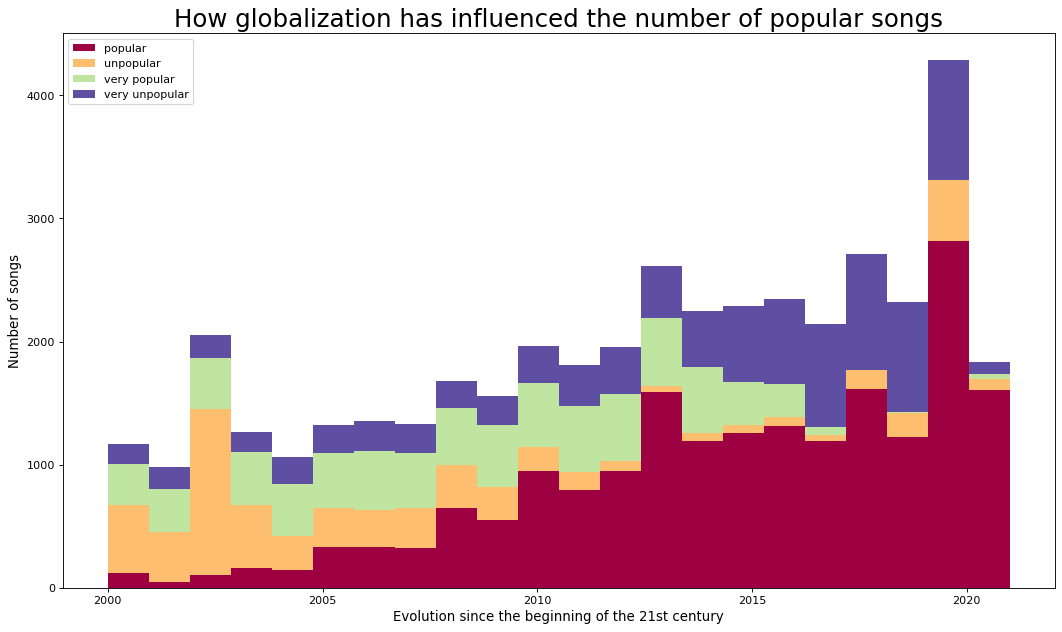

In [11]:
#Prepare data
x_var = 'year'
groupby_var = 'pop_category'
df20_agg = df20.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df20[x_var].values.tolist() for i, df20 in df20_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df20[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df20[groupby_var]).tolist(), colors[:len(vals)])})

plt.title(f"How globalization has influenced the number of popular songs", fontsize=22)
plt.xlabel("Evolution since the beginning of the 21st century", fontsize=12)
plt.ylabel("Number of songs",  fontsize=12)
plt.show()

### Conclusion: 
As we can see, the more recent years have the more popular songs, which makes sense since they are just released and are very recent still.

## B. What are the most popular songs and artists of all times?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "['The Beatles']"),
  Text(1, 0, "['Frank Sinatra']"),
  Text(2, 0, "['Elvis Presley']"),
  Text(3, 0, "['Fleetwood Mac']"),
  Text(4, 0, "['The Rolling Stones']"),
  Text(5, 0, "['Bob Dylan']"),
  Text(6, 0, "['Led Zeppelin']"),
  Text(7, 0, "['Taylor Swift']"),
  Text(8, 0, "['Queen']"),
  Text(9, 0, "['Johnny Cash']")])

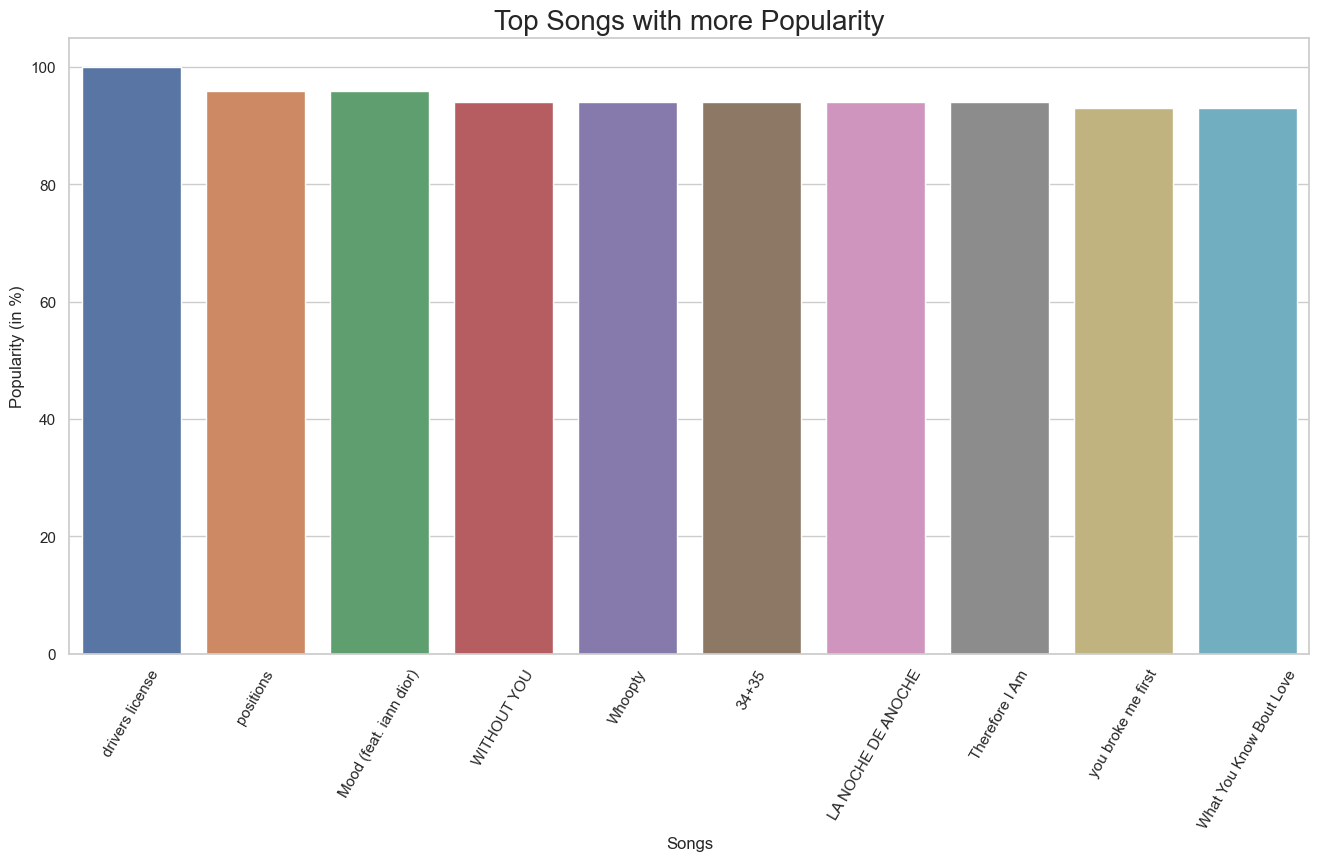

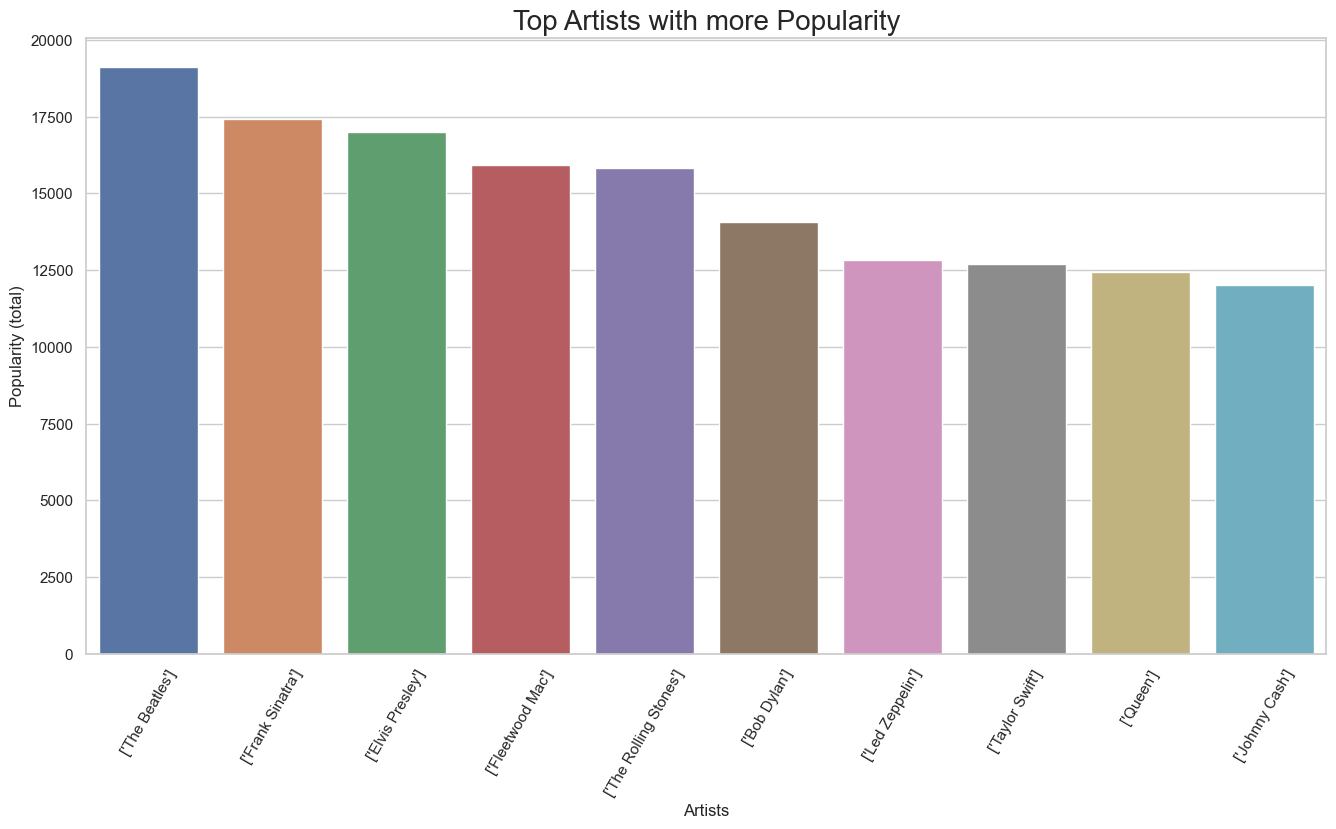

In [133]:
# Most popular songs
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Songs with more Popularity', fontsize=20)
ax.set_ylabel('Popularity (in %)')
ax.set_xlabel('Songs')
plt.xticks(rotation = 60)

# Most popular artists
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with more Popularity', fontsize=20)
ax.set_ylabel('Popularity (total)')
ax.set_xlabel('Artists')
plt.xticks(rotation = 60)

### Conclusion:

As we can see the top songs according to popularity are the most recent released songs which makes sense according to graph 1. If we look at the most popular artists however, we see that there is an opposite trend. The artists of the "classics" are the most popular artists which makes sense as they released the most iconic songs and had the biggest impact in the music industry.

## C. How did the audio-describing metrics evolve over the decades?

In [12]:
# Categorization of the column decade
df['decade'] = '1920s'
df.loc[(df['year'] > 1920) & (df['year'] <= 1930), 'decade'] = '1920s'
df.loc[(df['year'] > 1930) & (df['year'] <= 1940), 'decade'] = '1930s'
df.loc[(df['year'] > 1940) & (df['year'] <= 1950), 'decade'] = '1940s'
df.loc[(df['year'] > 1950) & (df['year'] <= 1960), 'decade'] = '1950s'
df.loc[(df['year'] > 1960) & (df['year'] <= 1970), 'decade'] = '1960s'
df.loc[(df['year'] > 1970) & (df['year'] <= 1980), 'decade'] = '1970s'
df.loc[(df['year'] > 1980) & (df['year'] <= 1990), 'decade'] = '1980s'
df.loc[(df['year'] > 1990) & (df['year'] <= 2000), 'decade'] = '1990s'
df.loc[(df['year'] > 2000) & (df['year'] <= 2010), 'decade'] = '2000s'
df.loc[(df['year'] > 2010) & (df['year'] <= 2022), 'decade'] = '2010s'

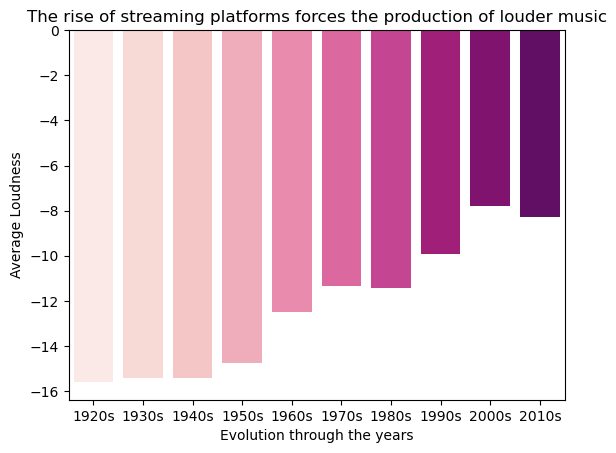

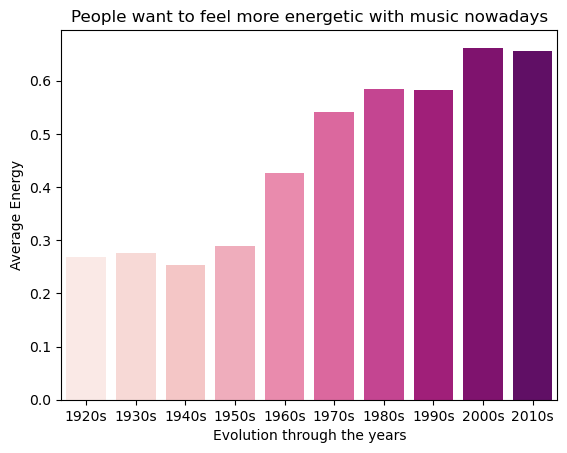

In [22]:
df2 = pd.DataFrame({'decades':["1920s","1930s","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s"],
                    'avg_energy': df.groupby('decade').mean()['energy'],
                    'avg_loudness': df.groupby('decade').mean()['loudness']})

df2.sort_values(by=['decade'], inplace=True)   

sns.barplot(x = "decades", y = "avg_loudness", data = df2)
plt.xlabel("Evolution through the years")
plt.ylabel("Average Loudness")
plt.title("The rise of streaming platforms forces the production of louder music")

sns.set_palette("RdPu",10)

plt.show()

sns.barplot(x = "decades", y = "avg_energy", data = df2)

plt.xlabel("Evolution through the years")
plt.ylabel("Average Energy")
plt.title("People want to feel more energetic with music nowadays")

sns.set_palette("RdPu",10)

plt.show()

### Conclusion: 
We can see that the average loudness and energy are positively related according to decades. The more we go to the recent years, the louder songs get and the more energy there is. This makes sense, especially with the upcoming trend of techno music, which creates a lot of energy and loudness.

## D. How are the audio-describing variables of the songs correlated with a song's popularity?

Text(70.58159722222221, 0.5, 'Metrics')

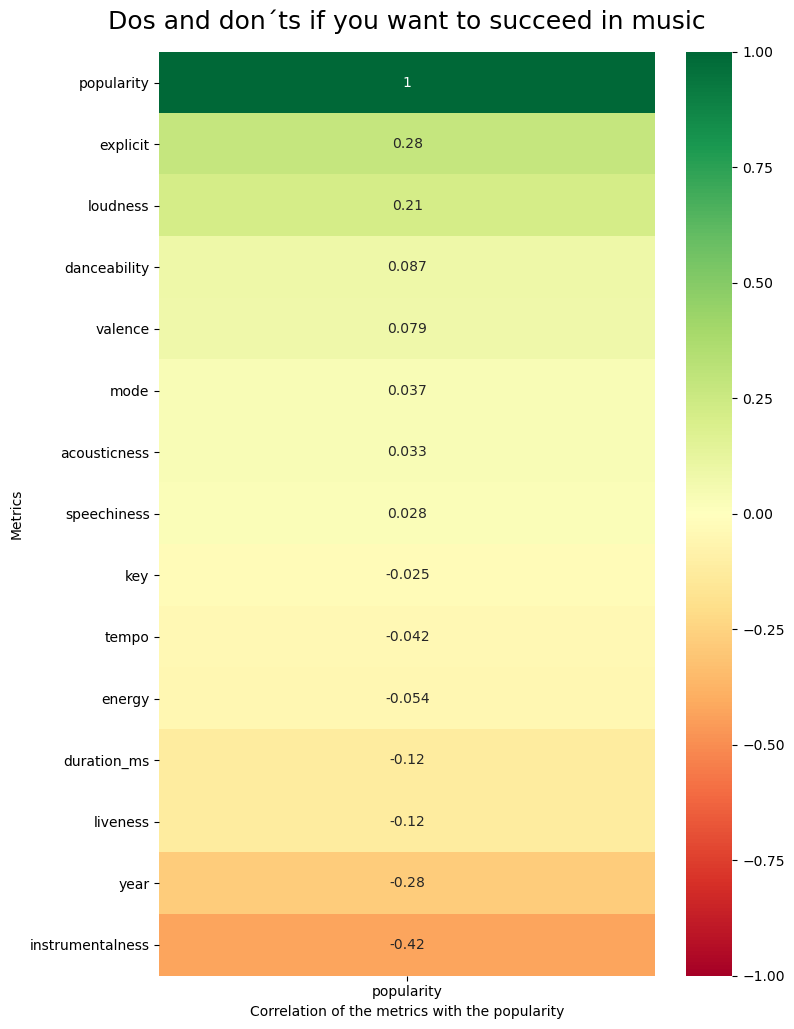

In [25]:
df20.corr()[['popularity']].sort_values(by='popularity', ascending=False)
plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(df20.corr()[['popularity']].sort_values(by='popularity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap2.set_title('Dos and don´ts if you want to succeed in music', fontdict={'fontsize':18}, pad=16)
plt.xlabel("Correlation of the metrics with the popularity")
plt.ylabel("Metrics")

### Conclusion:
Upon having a look at the correlation between all variables and popularity of the last 20 years, we see the variable "explicit" is the highest correlated to popularity. One could say that this due to the younger generation being more into the "explicit" songwriting. If we look at the oposite pole however, we see that the variable "instrumentalness" has the lowest correlation. This makes sense as explicit= voice (highest correlated) and instrumentalness= no voice (lowest correlation). 

### E. Is there a tendency of the most popular songs to be very danceable and energetic?

In [26]:
# Categorization of the column popularity
df3 = df[['energy','danceability','popularity', 'year']]


df3['popularity_level'] = 'No popular'
df3.loc[(df3['popularity'] <= 0), 'popularity_level'] = '1. No popular'
df3.loc[(df3['popularity'] > 0) & (df3['popularity'] <= 30), 'popularity_level'] = '2. Low popular'
df3.loc[(df3['popularity'] > 30) & (df3['popularity'] <= 50), 'popularity_level'] = '3. Mid popular'
df3.loc[(df3['popularity'] > 50) & (df3['popularity'] <= 70), 'popularity_level'] = '4. Popular'
df3.loc[(df3['popularity'] > 70) & (df3['popularity'] <= 100), 'popularity_level'] = '5. Very popular'


df3.head()

<ipython-input-26-646b2f45d235>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['popularity_level'] = 'No popular'
/Users/antonio/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/antonio/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,energy,danceability,popularity,year,popularity_level
0,0.224,0.598,12,1920,2. Low popular
1,0.517,0.852,7,1920,2. Low popular
2,0.186,0.647,4,1920,2. Low popular
3,0.798,0.730,17,1920,2. Low popular
4,0.707,0.704,2,1920,2. Low popular


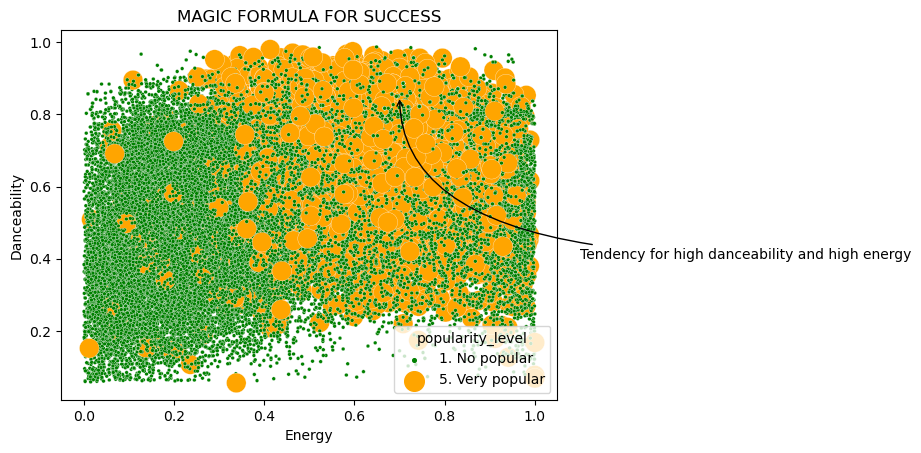

In [48]:
df4 = df3[df3.year >= 2020]
df4 = df3[(df3.popularity_level == "5. Very popular") | (df3.popularity_level == "1. No popular")] 

sns.scatterplot(data=df4, x="energy", y="danceability", hue="popularity_level", size = "popularity_level",
               sizes=(200, 7), palette=['green','orange'])

plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("MAGIC FORMULA FOR SUCCESS")
y_max=0.8
x_max=0.8
# plt.annotate('Tendency for high danceability and high energy', xy=(x_max,y_max), xytext=(3, 5),
#     arrowprops=dict(facecolor='black', shrink=1))

plt.annotate('Tendency for high danceability and high energy', xy=(0.7, 0.85), xytext=(1.1, 0.4),arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"));

### Conclusion: 
As seen in the graph above, we see that, the higher the energy and danceability, the more popular the song is. This is quite normal as songs are mainly played to party, move or sport making them the more popular songs.

### F. How danceable are the majority of the songs? What about the energy level of the songs?

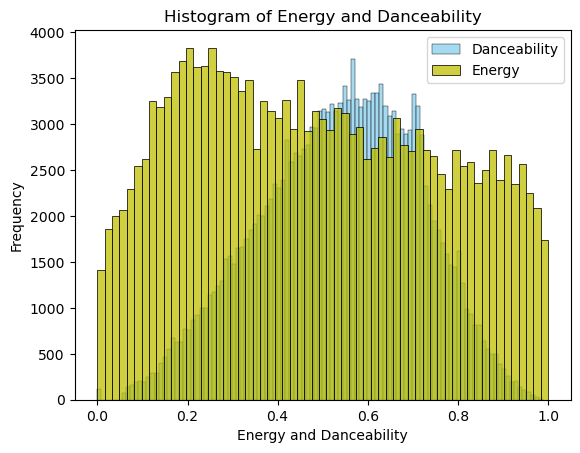

In [4]:
sns.histplot( df["danceability"] , color="skyblue", label="Danceability")
sns.histplot( df["energy"] , color="y", label="Energy")
plt.xlabel("Energy and Danceability")
plt.ylabel("Frequency")
plt.title("Histogram of Energy and Danceability")
plt.legend()

### Conclusion:

Here we can see the frequency of the different values of energy and danceability

### G. How did the songs' acousticness change over the decades? 

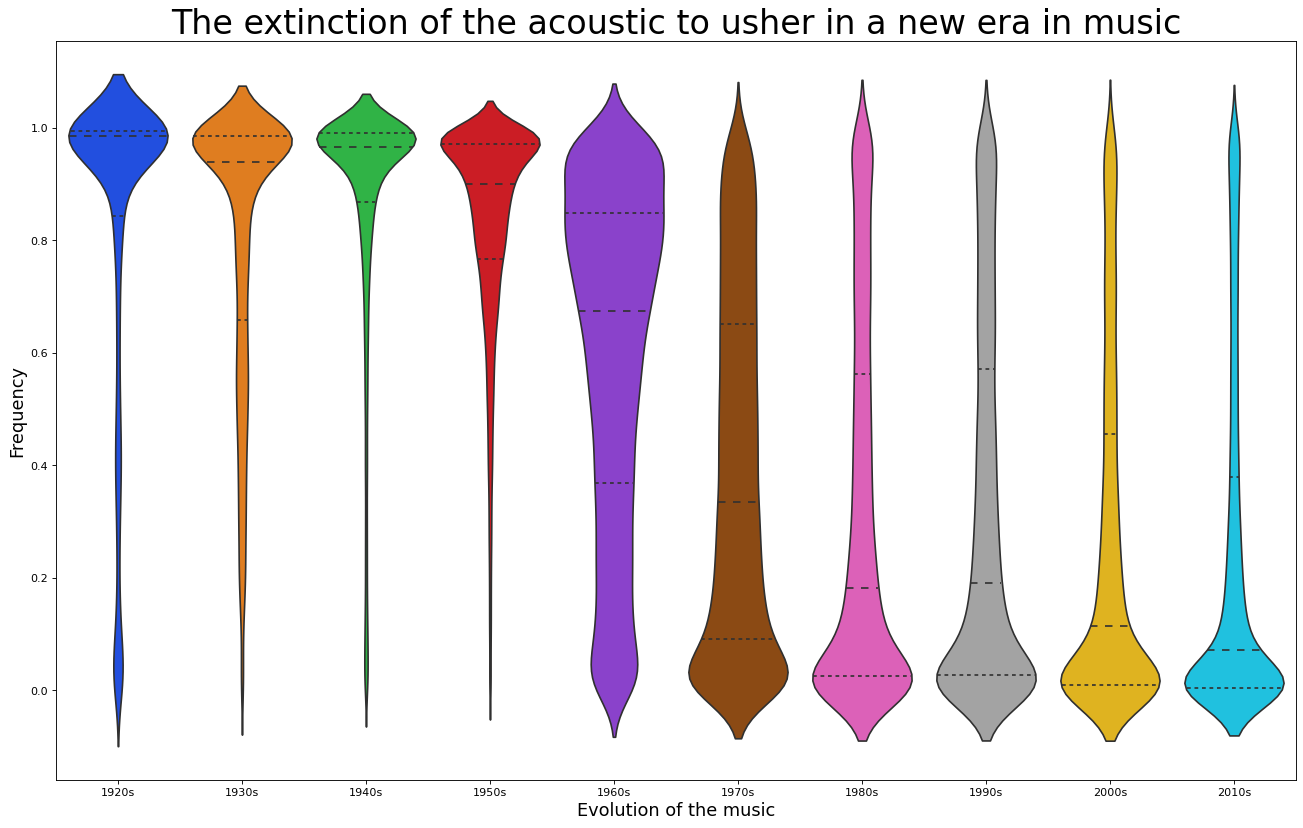

In [102]:
# Import Data

df = df[df["acousticness"] <= 1]
df = df[df["acousticness"] >= 0]

df.sort_values(by=['decade'], inplace=True)   
df

sns.set_palette("bright",10)

# Draw Plot
plt.figure(figsize=(20,12), dpi= 80)
sns.violinplot(x='decade', y='acousticness', data=df, scale='width', inner='quartile')

# Decoration
plt.title('The extinction of the acoustic to usher in a new era in music', fontsize=30)
plt.xlabel("Evolution of the music",  fontsize=16)
plt.ylabel("Frequency" , fontsize=16)


plt.show()

### Conclusion:

Here we see an interesting trend. As time moves on, we see a shift in trend according to "acousticness". The trend is as follows: in the 1920 to 1940 we see a very high average of acousticness but somewhere around the 1950 to 1970, we see that the average level of acousticness is going down to the point where, in the 1980 to 2010, the average level of acousticness goes down all the way, meaning a new era in music has come.

### H. How are the songs distributed in terms of their danceability?

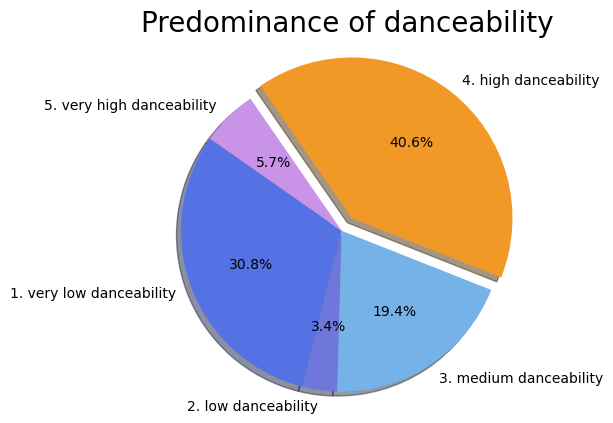

In [98]:
df7 = df

df7['danceability_level'] = '1. very low danceability'
df7.loc[(df7['danceability'] <= 0.2), 'danceability_level'] = '2. low danceability'
df7.loc[(df7['danceability'] > 0.2) & (df7['danceability'] <= 0.4), 'danceability_level'] = '3. medium danceability'
df7.loc[(df7['danceability'] > 0.5) & (df7['danceability'] <= 0.7), 'danceability_level'] = '4. high danceability'
df7.loc[(df7['danceability'] > 0.8) & (df7['danceability'] <= 1), 'danceability_level'] = '5. very high danceability'

df7.head()

# Prepare Data
df8 = df7.groupby('danceability_level').size()
df8


# Make the plot with pandas
# df.plot(kind='pie', subplots=True, figsize=(8, 8))
# plt.title("Distribution of songs according to their danceability")
# plt.ylabel("")
# plt.show()

explode = (0, 0,0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels = '1. very low danceability', '2. low danceability', '3. medium danceability', '4. high danceability','5. very high danceability'

fig1, ax1 = plt.subplots()
ax1.pie(df8, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=145, colors = ['#5572E5','#7077DA','#74B2E8','#F09927','#C993E8'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Decoration
plt.title('Predominance of danceability', fontsize=20)

plt.show()

### Conclusion: 
Here we can see a distribution according to danceability. The majority of the songs fall under high danceability. This makes sense as everyone most of the songs are conceive to be played in a disco or a pub, like reggeton for example.